In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from sklearn.externals.six import StringIO
from pprint import pprint
import sys
#!{sys.executable} -m pip install pydotplus
#!conda install --yes --prefix {sys.prefix} graphviz
import pydotplus 
import pandas

import sklearn.metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  cross_val_score

from IPython.display import Image
from scipy.stats import randint

C:\Users\ewert\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [41]:
#carrega a base iris do próprio sckit-learn
iris = load_iris()
digitData = pandas.read_csv('train.csv')
# carregando todas as características em X e os rótulos (labels, targets) em y
X = iris.data
y = iris.target #Sepal Length, Sepal Width, Petal Length and Petal Width.

print("As características são: " , iris.feature_names)


As características são:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


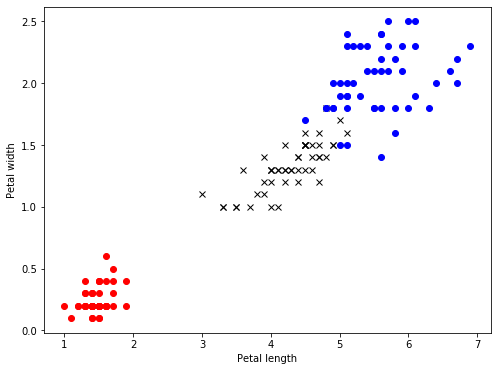

In [3]:
##########################
#Exercício 01
##########################

#plote o gráfico de dispersão. 
#Dica: analise o vetor de labels (y) e plote com cores 
#diferentes as características comprimento e largura da pétala 
#(armazenadas em X) de cada rótulo.
plt.figure(figsize=(8, 6))
plt.plot(X[0:50, 2], X[0:50,3], 'ro')
plt.plot(X[50:100, 2], X[50:100, 3], 'kx')
plt.plot(X[100:150, 2], X[100:150, 3], 'bo')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()


#analise visualmente como seriam as fronteiras de decisão, 
#considerando apenas cortes ortogonais.

In [4]:
#separando em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2)

# imprime as dimensões das bases
print("Dimensões das bases de treinamento e teste:")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Dimensões das bases de treinamento e teste:
(120, 4)
(30, 4)
(120,)
(30,)


In [5]:
# #classificação utilizando uma árvore de decisão não otimizada

# #cria o classificador
# clf = tree.DecisionTreeClassifier(criterion='gini') #testar com (criterion='entropy')

# #treina o classificador com a base de treinamento
# clf = clf.fit(X_train, y_train)

# #testa o classificador com a base de testes
# preditor = clf.predict(X_test)

# ##########################
# #Exercício 02 - A
# #mostrar a acurácia
# ##########################
# acc = sklearn.metrics.accuracy_score(y_test, preditor)
# print("\nAccuracy\n", acc)

# ##########################
# #Exercício 02 - B
# ##Analise a árvore de decisão criada
# ##########################
# #cria uma imagem para mostrar a árvore de decisão criada
# out = StringIO()
# tree.export_graphviz(clf, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
# #out = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)
# graph=pydotplus.graph_from_dot_data(out.getvalue())
# Image(graph.create_png())
# with open('irisDT.png', 'wb') as f:
#     f.write(graph.create_png())
# Image("irisDT.png") 


In [6]:
##########################
#Exercício 02 - C
##Crie um classificador (ie, uma árvore de decisão) com os parâmetros 
##definidos manualmente por você

#procure informações na documentação.
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
##########################
clf_rs = DecisionTreeClassifier()


In [7]:
#classificação utilizando uma árvore de decisão otimizada, onde os parâmetros são definidos pela função RandomizedSearchCV

clf_rs = DecisionTreeClassifier()

##########################
#Exercício 03 - A
#Analisar os parâmetros utilizados pela RandomizedSearchCV()
##########################
param_dist = {"criterion": ["gini", "entropy"],
                  "min_samples_split": randint(5, 20),
                  "max_depth": randint(1, 20),
                  "min_samples_leaf": randint(1, 20),
                  "max_leaf_nodes": randint(2, 20)}
   
# roda a randomized search     
clf_rs = RandomizedSearchCV(clf_rs, 
                            param_distributions=param_dist,
                            n_iter=5)

##########################
#Exercício 03 - B
#Treinar e testar o classificador. Depois, mostrar as métricas de avaliação 
#(mesmos passos realizados para a árvore não otimizada)
##########################

#treina o classificador com a base de treinamento
clf_rs.fit(X_train, y_train)

#testa o classificador com a base de testes
preditor = clf_rs.predict(X_test)
        
#mostrar a acurácia
acc = sklearn.metrics.accuracy_score(y_test, preditor)
print("\nAccuracy\n", acc)

##########################
#Exercício 03 - C
#Analisar os parâmetros (e índices) testados na RandomizedSearchCV()
##########################
print("\nParâmetros e índices do melhor estimador encontrado:")
print(clf_rs.best_params_)
print(clf_rs.best_estimator_)

print("\nÍndices para todos os testes realizados pela RandomizedSearchCV():")
means = clf_rs.cv_results_['mean_test_score']
stds = clf_rs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_rs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

##########################
#Exercício 03 - D
##Compare a árvore de decisão com a anterior (não-otimizada)
##########################
out = StringIO()
# tree.export_graphviz(clf_rs.best_estimator_, out_file=out, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
# graph=pydotplus.graph_from_dot_data(out.getvalue())
# Image(graph.create_png())
# with open('irisDT-RS.png', 'wb') as f:
#     f.write(graph.create_png())    
# Image("irisDT-RS.png") 


Accuracy
 1.0

Parâmetros e índices do melhor estimador encontrado:
{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 8, 'min_samples_split': 6}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
                       max_features=None, max_leaf_nodes=13,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Índices para todos os testes realizados pela RandomizedSearchCV():
0.933 (+/-0.085) for {'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 13, 'min_samples_leaf': 8, 'min_samples_split': 6}
0.933 (+/-0.085) for {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 15, 'min_samples_leaf': 8, 'min_samples_split': 11}
0.933 (+/-0.085) for {'criterion': 'entropy', 'max_depth': 19, 'max_leaf_nodes': 19

C:\Users\ewert\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# K-NN



2-nearest-neighbors
CrossAccuracy: 0.946330472646262
Accuracy: 0.95
3-nearest-neighbors
CrossAccuracy: 0.9664818612187034
Accuracy: 0.9666666666666667
4-nearest-neighbors
CrossAccuracy: 0.9732664995822891
Accuracy: 0.9833333333333333
5-nearest-neighbors
CrossAccuracy: 0.973165236323131
Accuracy: 1.0
6-nearest-neighbors
CrossAccuracy: 0.9799498746867169
Accuracy: 1.0
7-nearest-neighbors
CrossAccuracy: 0.9799498746867169
Accuracy: 0.9833333333333333
8-nearest-neighbors
CrossAccuracy: 0.9666499582289056
Accuracy: 1.0
9-nearest-neighbors
CrossAccuracy: 0.9732999164578111
Accuracy: 0.9833333333333333
10-nearest-neighbors
CrossAccuracy: 0.9799832915622388
Accuracy: 0.9833333333333333
11-nearest-neighbors
CrossAccuracy: 0.9799832915622388
Accuracy: 0.9666666666666667
12-nearest-neighbors
CrossAccuracy: 0.9799832915622388
Accuracy: 0.9333333333333333
13-nearest-neighbors
CrossAccuracy: 0.9732999164578111
Accuracy: 0.9666666666666667
14-nearest-neighbors
CrossAccuracy: 0.9666499582289056
Accura

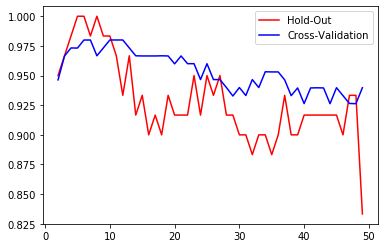

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4)
crossAccs = []
accs =[]
neighbors = range(2,50,1)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    score = knn.score(X_test, y_test)
    accs.append(score)
    scores = cross_val_score(knn, iris.data, iris.target, cv=5, scoring='f1_macro')
    print(f"{k}-nearest-neighbors")
#     print("Scores:", scores)
    print("CrossAccuracy:",np.mean(scores))
    print("Accuracy:",score)
    crossAccs.append(np.mean(scores))
plt.plot(neighbors, accs,'r',neighbors, crossAccs,'b')
plt.legend(["Hold-Out", "Cross-Validation"])
plt.show()

In [9]:
#https://scikit-learn.org/0.21/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


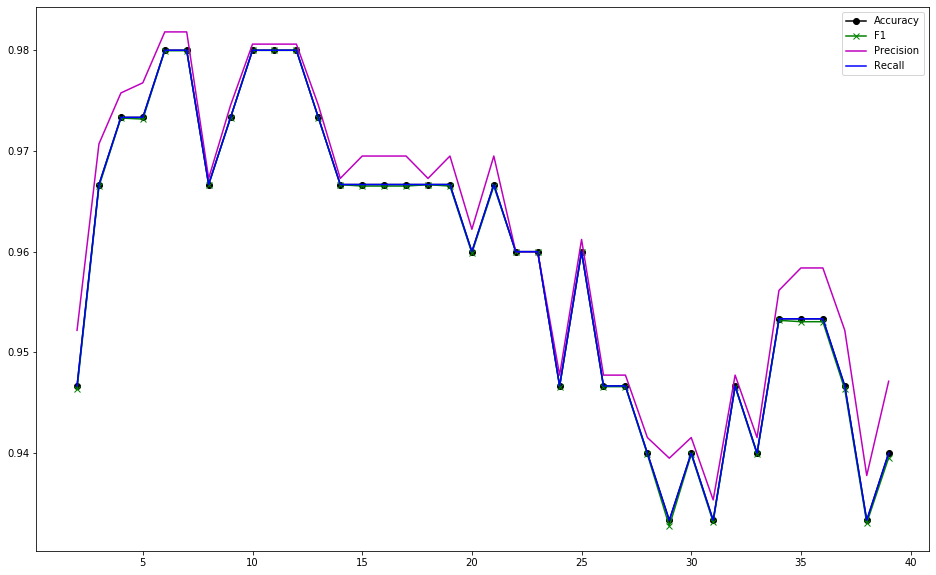

Best k is 10
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.94444444 0.05555556]
 [0.         0.         1.        ]]


<Figure size 1872x1872 with 0 Axes>

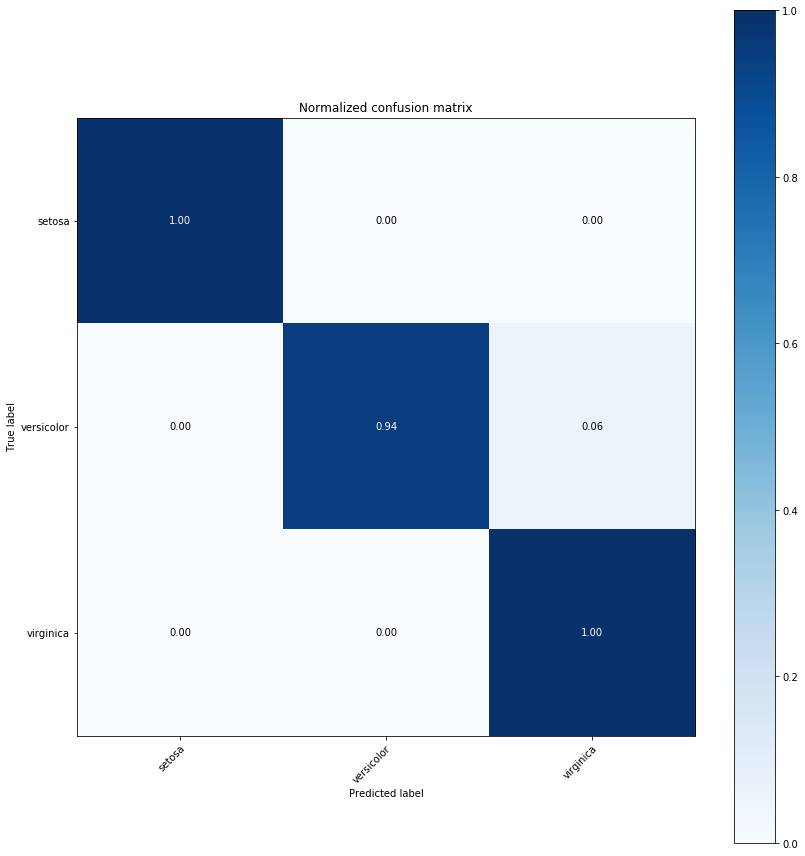

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def reportNeigh(totalData, target, target_names):
    X_train, X_test, y_train, y_test = train_test_split(totalData, target, test_size = 0.4)
    neighbors = range(2,40,1)
    accs = []
    f1 = []
    prec = []
    recall = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores = cross_validate(knn, totalData, target, cv=5, scoring=['f1_macro', 'accuracy', 'precision_macro', 'recall_macro'])
        (y_test, y_pred, target_names)
        accs.append(np.mean(scores['test_accuracy']))
        f1.append(np.mean(scores['test_f1_macro']))
        prec.append(np.mean(scores['test_precision_macro']))
        recall.append(np.mean(scores['test_recall_macro']))
        pass
    bestK = np.argmax(f1) + 2
    
    plt.figure(figsize=(16,10))
    plt.plot(neighbors, accs, 'k-o', neighbors, f1, 'g-x', neighbors, prec, 'm', neighbors, recall, 'b')
    plt.legend(["Accuracy", "F1", "Precision", "Recall"])
    plt.show()
    print(f"Best k is {bestK}")
    
    knn = KNeighborsClassifier(n_neighbors=bestK)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, target_names, normalize=True)
    plt.show

reportNeigh(iris.data, iris.target, iris.target_names)

In [49]:
from sklearn.naive_bayes import GaussianNB
def reportBayes(totalData, target, target_names):
    X_train, X_test, y_train, y_test = train_test_split(totalData, target, test_size = 0.4)
    score = []
    scorings = ['f1_macro', 'accuracy', 'precision_macro', 'recall_macro']
    gnb = GaussianNB()
    scores = cross_validate(gnb, totalData, target, cv=5, scoring=scorings)
    score.append(np.mean(scores['test_f1_macro']))
    score.append(np.mean(scores['test_accuracy']))
    score.append(np.mean(scores['test_precision_macro']))
    score.append(np.mean(scores['test_recall_macro']))
    
    plt.figure(figsize=(16,10))
    plt.bar(scorings, score)
    plt.ylim((0.5, 1))
    plt.show()
    
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    plot_confusion_matrix(np.array(y_test), np.array(y_pred), target_names, normalize=True)
    plt.show 


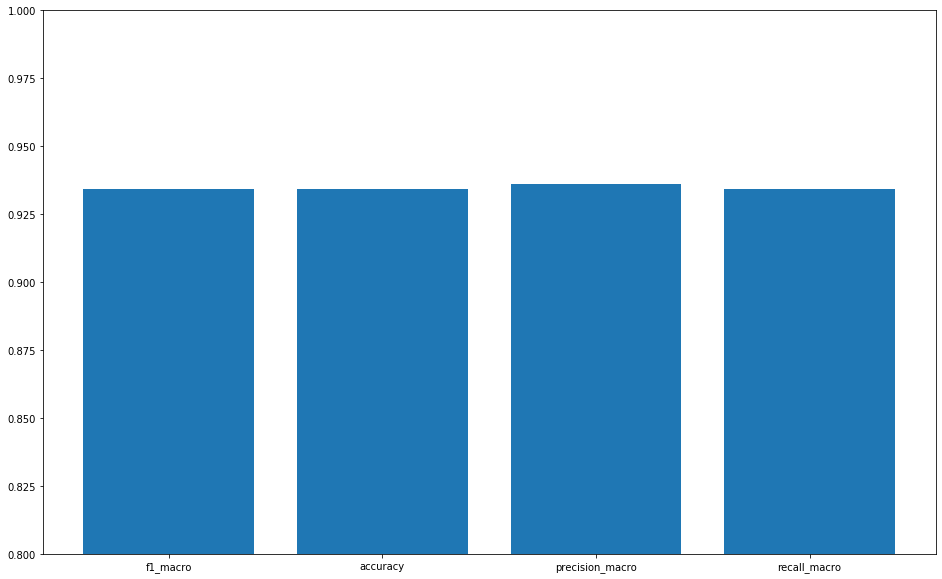

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.13636364 0.86363636]]


<Figure size 1872x1872 with 0 Axes>

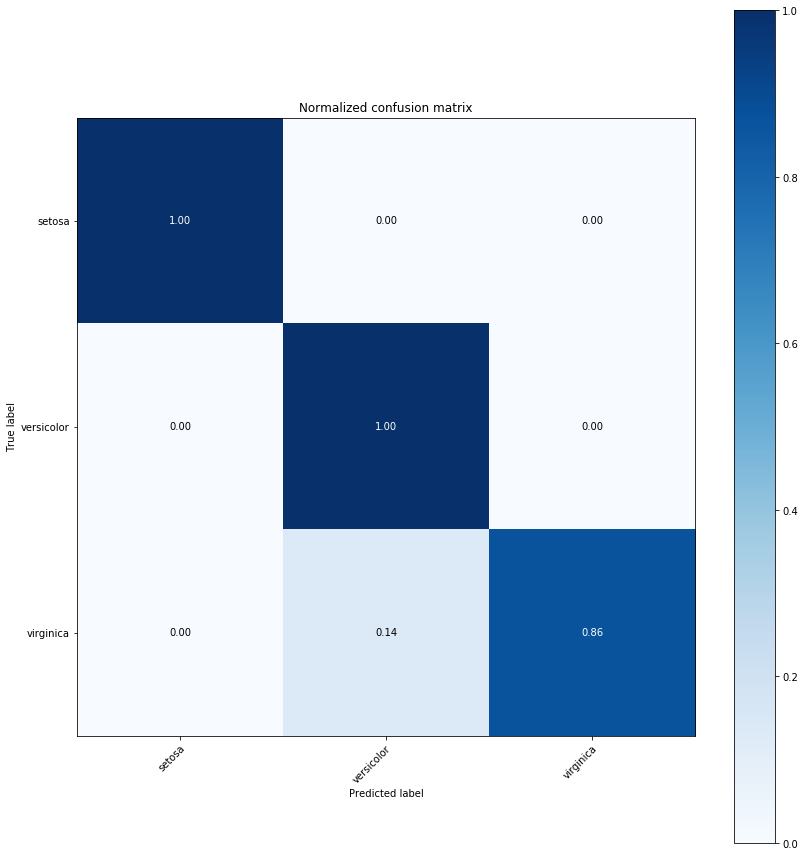

In [27]:
reportBayes(iris.data, iris.target, iris.target_names)

In [47]:
digitTarget = digitData.label.values
digitNames = range(10)
digitDataList = digitData.values.tolist()
digitNames = np.array([str(i) for i in digitNames])
digitTarget

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

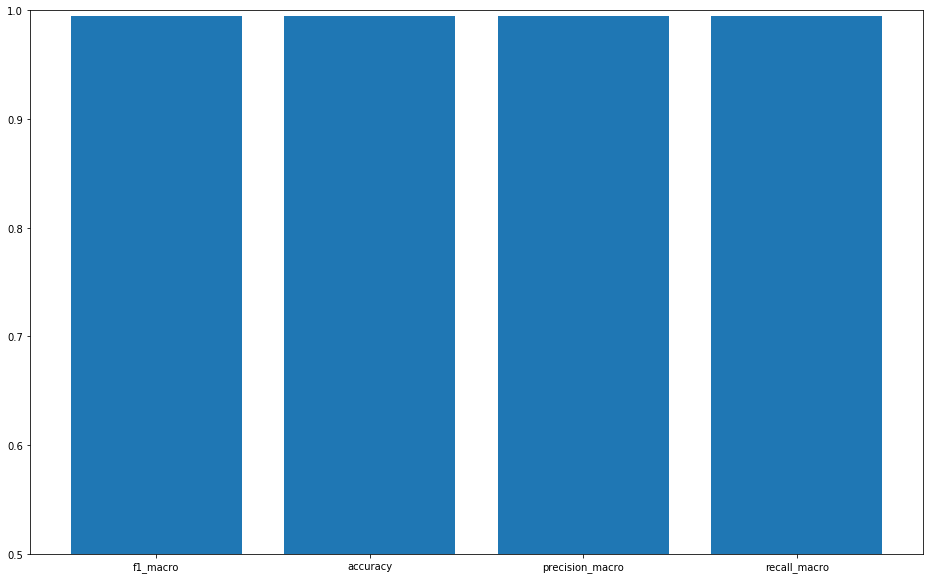

Normalized confusion matrix
[[9.92334906e-01 1.76886792e-03 4.12735849e-03 5.89622642e-04
  1.17924528e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.21439669e-03 9.80321077e-01 1.19109270e-02 1.03573278e-03
  0.00000000e+00 5.17866390e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.00961538e-04 9.93990385e-01 2.40384615e-03
  1.80288462e-03 6.00961538e-04 6.00961538e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.36686391e-03 9.93491124e-01
  4.14201183e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.87032419e-03 1.87032419e-03
  9.92518703e-01 2.49376559e-03 0.00000000e+00 1.24688279e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.87285223e-04
  0.00000000e+00 9.98625430e-01 6.87285223e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+0

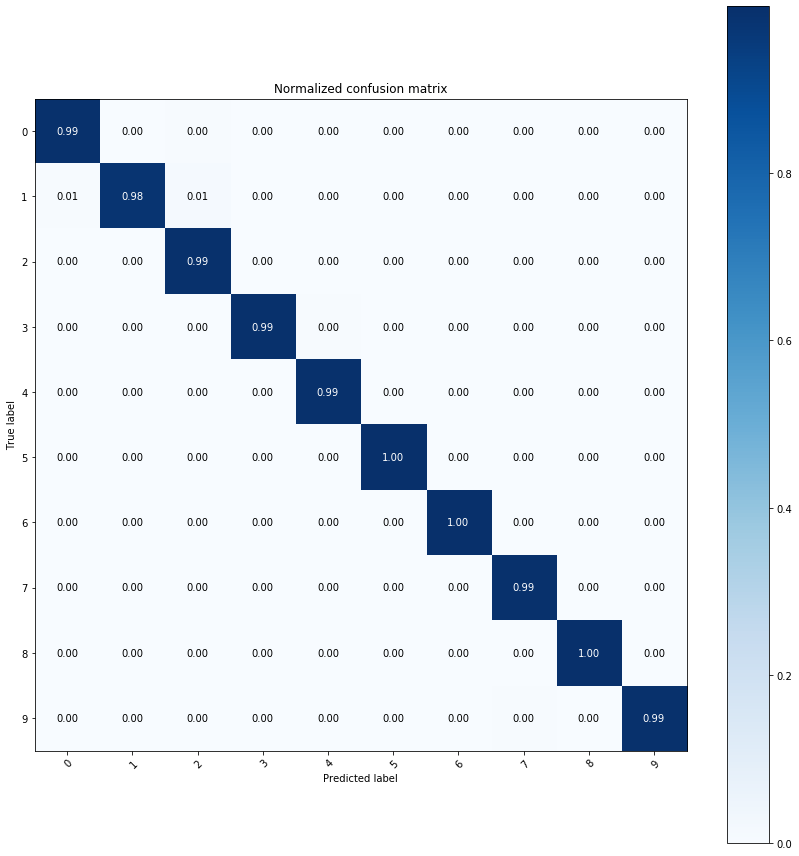

In [50]:
reportBayes(digitDataList, digitTarget, digitNames)
